# Two Diode [Garcia Sanchez et al.]

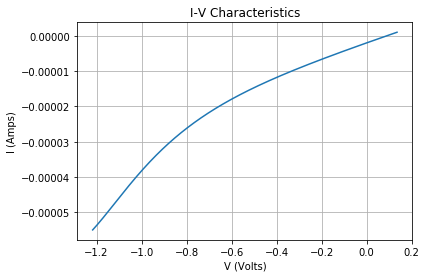

In [2]:
import matplotlib
from scipy.constants import e, k
from pylab import plot, show, xlabel, ylabel, title, grid

# Initialization
I_min = -5.5e-5 # Initial current value for voltage evaluation
I_max = 0.1e-5 # Final current value for voltage evaluation
Steps = 1000 # Total number of evaluation points for plotting

# Constants
q = e # Elementary Charge
kB = k # Boltzmann Constant

# Parameters
Iph = 4.85e-5 # Photogenerated Current (Amps)
I01 = 1.5e-5 # 1st Diode Reverse Saturation Current (Amps)
I02 = 2.4e-7 # 2nd Diode Reverse Saturation Current (Amps)
n1 = 2.4 # 1st Diode Ideality Factor
n2 = 9.5 # 2nd Diode Ideality Factor
Rs = 0. # Series Resistance (Ohms)
Rp1 = 1.0e8 # 1st Shunt Resistance (Ohms)
Rp2 = 4.6e4 # 2nd Shunt Resistance (Ohms)
T = 300. # Temperature (K)

# Equation
I = var('I')
V = + (I+Iph+I01)*Rp1 \
    - (n1*kB*T)/q*lambert_w((q/(n1*kB*T)) * I01*Rp1 * ((q/(n1*kB*T))*Rp1*(I+Iph+I01)).exp()) \
    + (n2*kB*T)/q*lambert_w(q/(n2*kB*T)*I02*Rp2* (-q/(n2*kB*T)*Rp2*(I-I02)).exp()) \
    + (I-I02)*Rp2 + I*Rs

# Ploting
x_axis = []
y_axis = []
for j in range(Steps+1) :
    I_step = I_min + j*(I_max-I_min)/Steps
    y_axis.append(I_step)
    x_axis.append(V(I_step))
plot(x_axis,y_axis)
title('I-V Characteristics')
xlabel('V (Volts)')
ylabel('I (Amps)')
grid(True)
show()

# Two Diode [Valluri & Roberts]

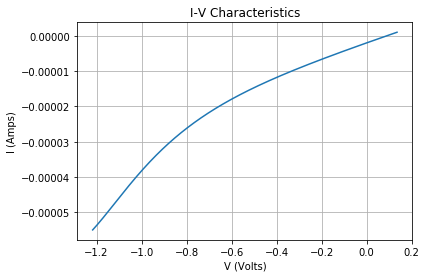

In [3]:
from scipy.constants import e, k
from pylab import plot, show, xlabel, ylabel, title, grid

# Initialization
I_min = -5.5e-5 # Initial current value for voltage evaluation
I_max = 0.1e-5 # Final current value for voltage evaluation
Steps = 1000 # Total number of evaluation points for plotting

# Constants
q = e # Elementary Charge
kB = k # Boltzmann Constant

# Parameters
Iph = 4.85e-5 # Photogenerated Current (Amps)
I01 = 1.5e-5 # 1st Diode Reverse Saturation Current (Amps)
I02 = 2.4e-7 # 2nd Diode Reverse Saturation Current (Amps)
n1 = 2.4 # 1st Diode Ideality Factor
n2 = 9.5 # 2nd Diode Ideality Factor
Rs = 0. # Series Resistance (Ohms)
Rp1 = 1.0e8 # 1st Shunt Resistance (Ohms)
Rp2 = 4.6e4 # 2nd Shunt Resistance (Ohms)
T = 300. # Temperature (K)

# Equation
I = var('I')
V = + I*Rs \
    + (n1*kB*T)/q*log(lambert_w(((q/(n1*kB*T)*I01*Rp1).log() + q/(n1*kB*T)*Rp1*(I+Iph+I01)).exp())) - (n2*kB*T)/q*log(lambert_w(((q/(n2*kB*T)*I02*Rp2).log() - q/(n2*kB*T)*Rp2*(I-I02)).exp())) \
    - (n1*kB*T)/q*(q/(n1*kB*T)*I01*Rp1).log() \
    + (n2*kB*T)/q*(q/(n2*kB*T)*I02*Rp2).log()

# Plotting
x_axis = []
y_axis = []
for j in range(Steps+1) :
    I_step = I_min + j*(I_max-I_min)/Steps
    y_axis.append(I_step)
    x_axis.append(V(I_step))
plot(x_axis,y_axis)
title('I-V Characteristics')
xlabel('V (Volts)')
ylabel('I (Amps)')
grid(True)
show()